In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get Data
data = pd.read_csv("handwritten_data_785.csv", encoding = 'utf8')

In [2]:
# Reshape Data
features = data.iloc[:, 1:]
features.shape

(372037, 784)

(37000, 784)

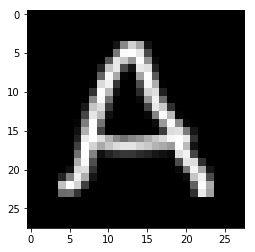

In [3]:
plt.imshow(np.array(features.iloc[0]).reshape(28,28), cmap = 'gray')
features[0:37000].shape

In [4]:
x_train = np.array(features[0:370000]).reshape(-1,28,28)
x_test = np.array(features[370001:]).reshape(-1,28,28)

x_train_noisy = np.zeros(x_train.shape)
x_test_noisy = np.zeros(x_test.shape)

for i in range(len(x_train)):
    x_train_noisy[i] = x_train[i] + 50 * np.random.normal(np.random.rand(1)[0],3.5*np.random.rand(1)[0],size=(28,28))
for i in range(len(x_test)):   
    x_test_noisy[i] = x_test[i] + 50 * np.random.normal(np.random.rand(1)[0],3.5*np.random.rand(1)[0],size=(28,28))

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

x_train_noisy = np.reshape(x_train_noisy,(len(x_train),28,28,1))
x_test_noisy = np.reshape(x_test_noisy,(len(x_test),28,28,1))

x_train_noisy = x_train_noisy.astype('float32')/255
x_test_noisy = x_test_noisy.astype('float32')/255

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# plt.imshow(x_train[200000])

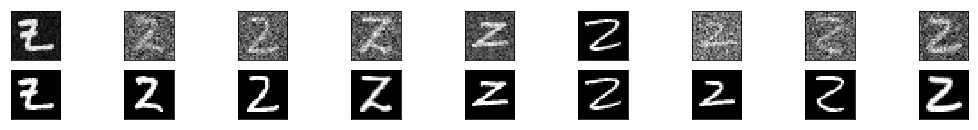

In [15]:
import random
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    index = random.sample(range(len(x_test_noisy)),1)
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Input,UpSampling2D,Conv2DTranspose
input_layer = Input(shape=(28,28,1))
layer = Conv2D(20,3,padding='same',activation='relu',use_bias=True)(input_layer)
layer = MaxPooling2D(2,padding='same')(layer)
layer = Conv2D(10,3,padding='same',activation='relu',use_bias=True)(layer)

encoded = MaxPooling2D(2,padding='same')(layer)

dLayer = UpSampling2D(2)(encoded)
dLayer = Conv2DTranspose(10,3,padding='same',activation='relu')(dLayer)
dLayer = UpSampling2D(2)(dLayer)
dLayer = Conv2DTranspose(20,3,padding='same',activation='relu')(dLayer)

decoded = Conv2DTranspose(1,3,padding='same',activation='sigmoid')(dLayer)

Using TensorFlow backend.


In [16]:
from keras.models import Model
encoderModel = Model(input_layer, encoded)

deNoiser = Model(input_layer, decoded)
deNoiser.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 10)        1810      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 10)        910       
__________

In [18]:
deNoiser.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
deNoiser.fit(x_test_noisy, x_test, epochs=5)

Epoch 1/5
2036/2036 [==============================] - 6s 3ms/step - loss: 0.1293 - acc: 0.8260
Epoch 2/5
2036/2036 [==============================] - 6s 3ms/step - loss: 0.1283 - acc: 0.8262
Epoch 3/5
2036/2036 [==============================] - 6s 3ms/step - loss: 0.1263 - acc: 0.8266
Epoch 4/5
2036/2036 [==============================] - 6s 3ms/step - loss: 0.1259 - acc: 0.8266
Epoch 5/5
2036/2036 [==============================] - 6s 3ms/step - loss: 0.1247 - acc: 0.8269


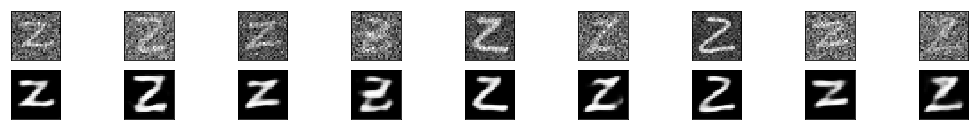

In [27]:
predictions = deNoiser.predict(x_test_noisy)

import random
random.sample(range(len(predictions)),1)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    index = random.sample(range(len(predictions)),1)
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(predictions[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)